## This project demonstrates the applicability of CLT(Central Limit Theorem) towards efficient data representation of a large population and for further data analysis

BACKGROUND:You are a DJ trying to make sure you are ready for a big party. You don’t have time to go through all the songs you can work with. Instead, you want to make sure that any sample of 30 songs from your playlist will get the party started.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
import os

Let's first check first few lines of the dataset.

In [2]:
os.listdir()
spotify_data = pd.read_csv('DJdanceparty.csv')
spotify_data.head()

,tempo,danceability,energy,instrumentalness,liveness,valence
0,156.985,0.831,0.814,0.013400,0.0556,0.3890
1,115.080,0.719,0.493,0.000000,0.1180,0.1240
2,218.050,0.850,0.893,0.000004,0.3720,0.0391
3,186.948,0.476,0.781,0.000000,0.1140,0.1750
4,147.988,0.798,0.624,0.000000,0.1660,0.5910


we here focus on the variable "tempo" which gives the beats per minute (bpm) of each song.

In [4]:
song_tempo = spotify_data.tempo
print(song_tempo)

0        156.985
1        115.080
2        218.050
3        186.948
4        147.988
          ...   
42300    150.013
42301    149.928
42302    154.935
42303    150.042
42304    155.047
Name: tempo, Length: 42305, dtype: float64


here we create helper functions such as "choose_statistic","population_distribution" and "sampling_distribution" to select statistic to work with the population and form sampling distribution.

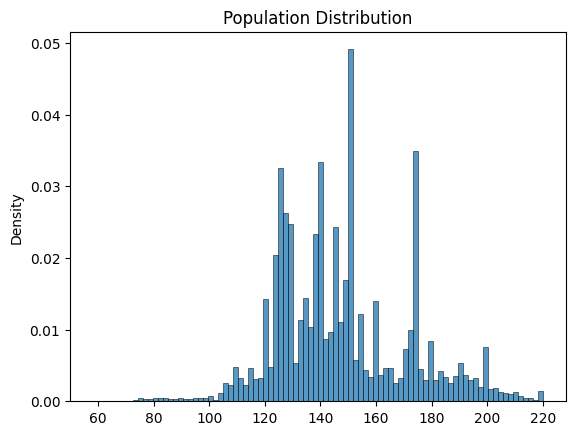

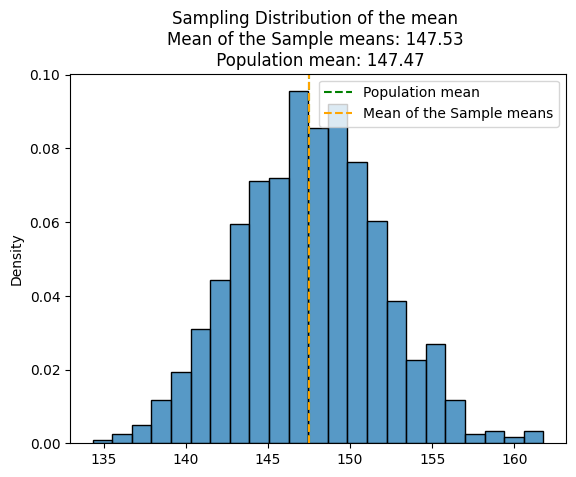

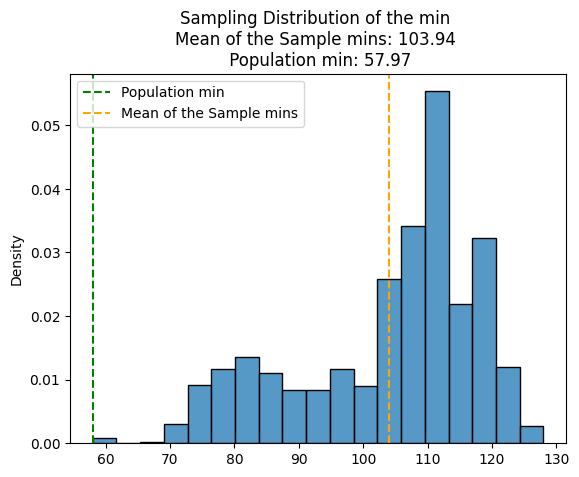

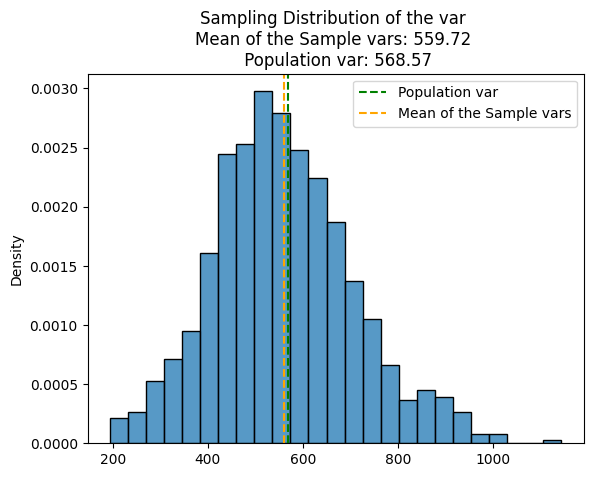

<Figure size 640x480 with 0 Axes>

In [11]:
def choose_statistic(x,text):
    if text=='mean':
        return np.mean(x)
    elif text=='var':
        return np.var(x,ddof=1)
    elif text=='min':
        return np.min(x)
    else:
        raise Exception("Make sure you input either mean,min or var")

def population_distribution(population_data):
    sns.histplot(population_data,stat='density')
    plt.title(f"Population Distribution")
    plt.xlabel("")
    plt.show()
    plt.clf()

def sampling_distribution(population_data,sample_size,stat):
    sample_stats=[]
    
    for i in range(1000):
        samp = np.random.choice(population_data,sample_size,replace=False)
        sample_stat = choose_statistic(samp,stat)
        sample_stats.append(sample_stat)

    pop_statistic = round(choose_statistic(population_data,stat),2)
    sns.histplot(sample_stats, stat='density')
    plt.title(f"Sampling Distribution of the {stat} \nMean of the Sample {stat}s: {round(np.mean(sample_stats), 2)} \n Population {stat}: {pop_statistic}")
    plt.axvline(pop_statistic,color='g',linestyle='dashed', label=f'Population {stat}')
    plt.axvline(np.mean(sample_stats),color='orange',linestyle='dashed', label=f'Mean of the Sample {stat}s')
    plt.legend()
    plt.show()
    plt.clf()

population_distribution(song_tempo)
sampling_distribution(song_tempo,30,'mean')
sampling_distribution(song_tempo,30,'min')
sampling_distribution(song_tempo,30,'var')

use the population_distribution() function to graph distribution of song_tempos.

Now we compute population mean & population standard deviation of song_tempo. 

In [13]:
population_mean=np.mean(song_tempo)
population_std=np.std(song_tempo)
standard_error=population_std/(30**0.5)

You are afraid that if the average tempo of the songs you randomly select is less than 140bpm that your party will not be enjoyable.

So, we compute the probability from the sampling distribution of mean of 30 selected songs to have mean less than 140bpm.

In [16]:
print("Probability of sampling 30 songs to have mean <140bpm is: ",stats.norm.cdf(140,population_mean,standard_error))

Probability of sampling 30 songs to have mean <140bpm is:  0.043003550159587636


You know the party will be truly epic if the randomly sampled songs have an average tempo of greater than 150bpm. We here compute the above possibility of obtaining a mean of >150bpm.

In [17]:
print("Probability of sampling 30 songs to have mean >150bpm is: ",1-stats.norm.cdf(150,population_mean,standard_error))

Probability of sampling 30 songs to have mean >150bpm is:  0.2808802810182194
